In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
from pandas_datareader import data as pdr

In [15]:
# import data
def get_data(stocks, start, end):
    stockData = yf.download(stocks, start, end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

In [16]:
stocklist = ['CBA', 'BHP', 'TLS', 'NAB', 'WBC', 'STO']
stocks = [stock + '.AX' for stock in stocklist]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)
meanReturns, covMatrix = get_data(stocks, startDate, endDate)
print(meanReturns)

[*********************100%%**********************]  6 of 6 completed

Ticker
BHP.AX    0.000017
CBA.AX    0.000744
NAB.AX    0.001349
STO.AX    0.000246
TLS.AX   -0.000698
WBC.AX    0.001052
dtype: float64


In [17]:
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)
print(weights)

[0.42233262 0.08151358 0.1883054  0.14256846 0.12013235 0.04514759]


In [20]:
# Monte Carlo simulations
mc_sims = 100
T = 100 # timeframe in days

meanM = np.full(shape=(T,len(weights)), fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

initialPortfolio = 10000

for m in range(0, mc_sims):
    # MC loops
    Z = np.random.normal(size=(T, len(weights)))
    L = np.linalg.cholesky(covMatrix)
    dailyReturns = meanM + np.inner(L, Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

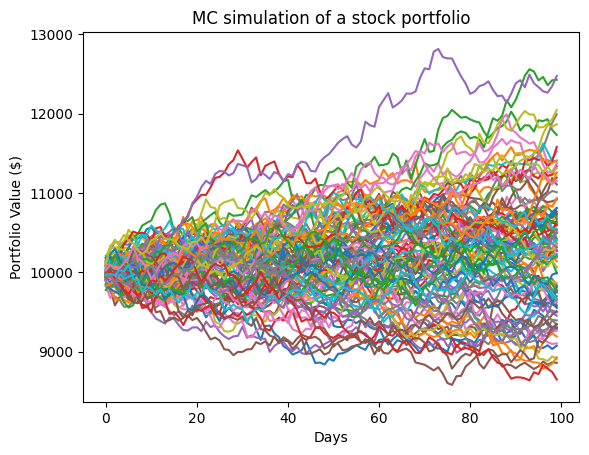

In [21]:
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()